In [172]:
import pandas as pd
Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = pd.DataFrame(Data,columns=['x','y'])
df

,x,y
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59
5,33,74
6,31,73
7,22,57
8,35,69
9,34,75


In [173]:
import matplotlib.pyplot as plt 

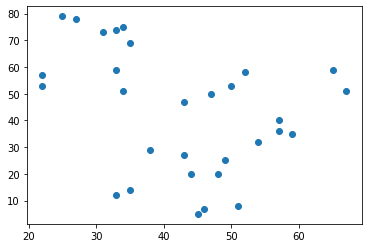

In [174]:
plt.plot(df['x'],df['y'],'o')

In [129]:
centroid1=(30,70)
centroid2=(45,20)
centroid3=(50,58)

x_centroids=list(zip(centroid1,centroid2,centroid3))[0]
y_centroids=list(zip(centroid1,centroid2,centroid3))[1]


In [131]:
x_centroids,y_centroids

((30, 45, 50), (70, 20, 58))

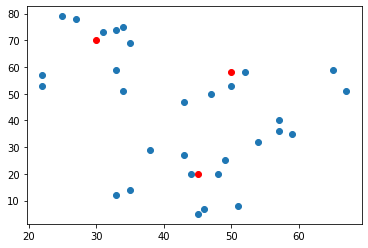

In [132]:
plt.plot(df['x'],df['y'],'o')
plt.plot(x_centroids,y_centroids,'ro')

In [133]:
# Eucledian Distance 

from scipy.spatial import distance
a = (1, 2)
b = (4, 5)
dst = distance.euclidean(a, b)

dst

4.242640687119285

In [134]:
df['point'] = list(zip(df.x, df.y))

df['centroid1']=[centroid1]*len(df)
df['centroid2']=[centroid2]*len(df)
df['centroid3']=[centroid3]*len(df)


df['DistCentroid1'] = df.apply(lambda x: distance.euclidean(x.point, x.centroid1), axis=1)
df['DistCentroid2'] = df.apply(lambda x: distance.euclidean(x.point, x.centroid2), axis=1)
df['DistCentroid3'] = df.apply(lambda x: distance.euclidean(x.point, x.centroid3), axis=1)



In [135]:
df.head(10)

,x,y,point,centroid1,centroid2,centroid3,DistCentroid1,DistCentroid2,DistCentroid3
0,25,79,"(25, 79)","(30, 70)","(45, 20)","(50, 58)",10.295630,62.297673,32.649655
1,34,51,"(34, 51)","(30, 70)","(45, 20)","(50, 58)",19.416488,32.893768,17.464249
2,22,53,"(22, 53)","(30, 70)","(45, 20)","(50, 58)",18.788294,40.224371,28.442925
3,27,78,"(27, 78)","(30, 70)","(45, 20)","(50, 58)",8.544004,60.728906,30.479501
4,33,59,"(33, 59)","(30, 70)","(45, 20)","(50, 58)",11.401754,40.804412,17.029386
5,33,74,"(33, 74)","(30, 70)","(45, 20)","(50, 58)",5.000000,55.317267,23.345235
6,31,73,"(31, 73)","(30, 70)","(45, 20)","(50, 58)",3.162278,54.817880,24.207437
7,22,57,"(22, 57)","(30, 70)","(45, 20)","(50, 58)",15.264338,43.566042,28.017851
8,35,69,"(35, 69)","(30, 70)","(45, 20)","(50, 58)",5.099020,50.009999,18.601075
9,34,75,"(34, 75)","(30, 70)","(45, 20)","(50, 58)",6.403124,56.089215,23.345235


In [136]:
def GetCluster(list_of_all_dist):
    min_value=min(list_of_all_dist)
    return list_of_all_dist.index(min_value)+1

df['Cluster']=df.apply(lambda x: GetCluster([x.DistCentroid1, x.DistCentroid2,x.DistCentroid3]), axis=1)


In [175]:
df

,x,y
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59
5,33,74
6,31,73
7,22,57
8,35,69
9,34,75


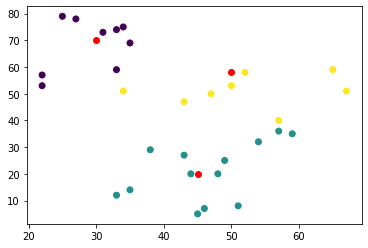

In [137]:
plt.scatter(df['x'], df['y'], c=df['Cluster'])  
plt.plot(x_centroids,y_centroids,'ro')
plt.show()

In [138]:
df.groupby('Cluster').mean()[['x','y']]

,x,y
Cluster,,
1,29.111111,68.555556
2,46.307692,20.769231
3,51.875000,51.125000


In [139]:
centroid1=tuple(df.groupby('Cluster').mean()[['x','y']].loc[1].round(2))
centroid2=tuple(df.groupby('Cluster').mean()[['x','y']].loc[2].round(2))
centroid3=tuple(df.groupby('Cluster').mean()[['x','y']].loc[3].round(2))



In [140]:
x_centroids=list(zip(centroid1,centroid2,centroid3))[0]
y_centroids=list(zip(centroid1,centroid2,centroid3))[1]


In [141]:
centroid1,centroid2,centroid3

((29.11, 68.56), (46.31, 20.77), (51.88, 51.12))

In [142]:
df['centroid1']=[centroid1]*len(df)
df['centroid2']=[centroid2]*len(df)
df['centroid3']=[centroid3]*len(df)


df['DistCentroid1'] = df.apply(lambda x: distance.euclidean(x.point, x.centroid1), axis=1)
df['DistCentroid2'] = df.apply(lambda x: distance.euclidean(x.point, x.centroid2), axis=1)
df['DistCentroid3'] = df.apply(lambda x: distance.euclidean(x.point, x.centroid3), axis=1)



In [143]:
df

,x,y,point,centroid1,centroid2,centroid3,DistCentroid1,DistCentroid2,DistCentroid3,Cluster
0,25,79,"(25, 79)","(29.11, 68.56)","(46.31, 20.77)","(51.88, 51.12)",11.219880,62.006846,38.727623,1
1,34,51,"(34, 51)","(29.11, 68.56)","(46.31, 20.77)","(51.88, 51.12)",18.228157,32.640297,17.880403,3
2,22,53,"(22, 53)","(29.11, 68.56)","(46.31, 20.77)","(51.88, 51.12)",17.107475,40.370150,29.939085,1
3,27,78,"(27, 78)","(29.11, 68.56)","(46.31, 20.77)","(51.88, 51.12)",9.672936,60.399909,36.627159,1
4,33,59,"(33, 59)","(29.11, 68.56)","(46.31, 20.77)","(51.88, 51.12)",10.321129,40.480724,20.458465,1
5,33,74,"(33, 74)","(29.11, 68.56)","(46.31, 20.77)","(51.88, 51.12)",6.687728,54.868835,29.663931,1
6,31,73,"(31, 73)","(29.11, 68.56)","(46.31, 20.77)","(51.88, 51.12)",4.825526,54.427649,30.244153,1
7,22,57,"(22, 57)","(29.11, 68.56)","(46.31, 20.77)","(51.88, 51.12)",13.571503,43.630139,30.453059,1
8,35,69,"(35, 69)","(29.11, 68.56)","(46.31, 20.77)","(51.88, 51.12)",5.906412,49.538359,24.589201,1
9,34,75,"(34, 75)","(29.11, 68.56)","(46.31, 20.77)","(51.88, 51.12)",8.086142,55.609612,29.832010,1


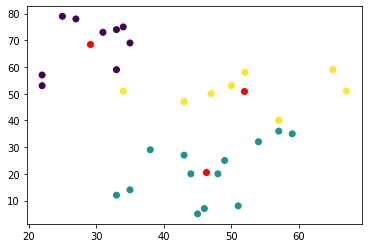

In [144]:
plt.scatter(df['x'], df['y'], c=df['Cluster'])  
plt.plot(x_centroids,y_centroids,'ro')
plt.show()

In [181]:
Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = pd.DataFrame(Data,columns=['x','y'])
df['point'] = list(zip(df.x, df.y))

centroid1=(30,70)
centroid2=(45,20)
centroid3=(50,58)



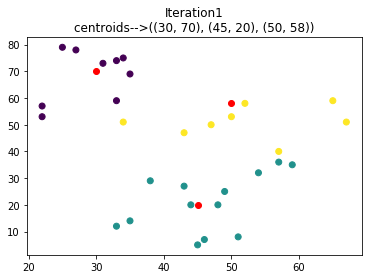

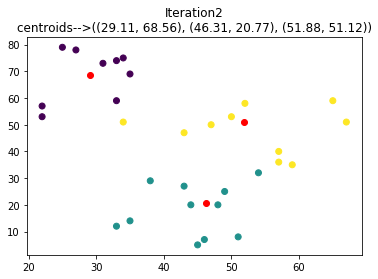

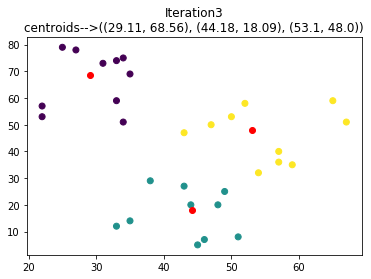

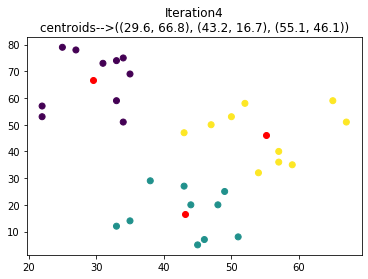

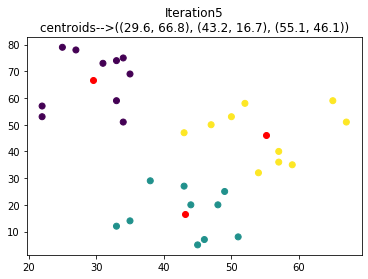

In [182]:
n_iterations=5
for each in range(n_iterations):
    
    x_centroids=list(zip(centroid1,centroid2,centroid3))[0]
    y_centroids=list(zip(centroid1,centroid2,centroid3))[1]

    df['centroid1']=[centroid1]*len(df)
    df['centroid2']=[centroid2]*len(df)
    df['centroid3']=[centroid3]*len(df)


    df['DistCentroid1'] = df.apply(lambda x: distance.euclidean(x.point, x.centroid1), axis=1)
    df['DistCentroid2'] = df.apply(lambda x: distance.euclidean(x.point, x.centroid2), axis=1)
    df['DistCentroid3'] = df.apply(lambda x: distance.euclidean(x.point, x.centroid3), axis=1)
    
    df['Cluster']=df.apply(lambda x: GetCluster([x.DistCentroid1, x.DistCentroid2,x.DistCentroid3]), axis=1)
    
    plt.title("Iteration"+str(each+1)+ "\ncentroids-->"+str((centroid1,centroid2,centroid3)))
    plt.scatter(df['x'], df['y'], c=df['Cluster'])  
    plt.plot(x_centroids,y_centroids,'ro')
    plt.show()
    
    centroid1=tuple(df.groupby('Cluster').mean()[['x','y']].loc[1].round(2))
    centroid2=tuple(df.groupby('Cluster').mean()[['x','y']].loc[2].round(2))
    centroid3=tuple(df.groupby('Cluster').mean()[['x','y']].loc[3].round(2))

    

    



## Scikit Learn Kmeans 

In [183]:

Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = pd.DataFrame(Data,columns=['x','y'])

from sklearn.cluster import KMeans

kmeans=KMeans(3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [185]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [189]:

cluster_group=kmeans.labels_


In [190]:
df['Cluster']=cluster_group

In [191]:
df


,x,y,Cluster
0,25,79,2
1,34,51,2
2,22,53,2
3,27,78,2
4,33,59,2
5,33,74,2
6,31,73,2
7,22,57,2
8,35,69,2
9,34,75,2


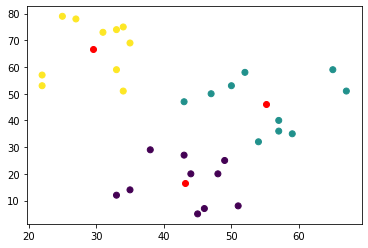

In [192]:
plt.scatter(df['x'], df['y'], c=df['Cluster'])  
plt.plot(x_centroids,y_centroids,'ro')
plt.show()

In [198]:
kmeans.predict( [ (40,60) ] ) 

array([2], dtype=int32)

In [194]:
kmeans.predict([[60,30]])

array([1], dtype=int32)

In [170]:
kmeans.cluster_centers_

array([[55.1, 46.1],
       [43.2, 16.7],
       [29.6, 66.8]])

In [171]:
centroid1,centroid2,centroid3


((29.6, 66.8), (43.2, 16.7), (55.1, 46.1))